[View in Colaboratory](https://colab.research.google.com/github/anilpdv/imdb-reviews-binary-calssification/blob/master/binaryClassification2.ipynb)

In [0]:
#loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#loading deep learing libraries
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from keras.datasets import imdb

# project imdb


In [3]:

#loading the dataset
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 4s 0us/step


In [4]:
#shape of the data
train_data.shape

(25000,)

In [5]:
#labels of data
train_labels

array([1, 0, 0, ..., 0, 1, 0])

**This is binary classification problem**

In [0]:
#encoding the integer sequences into a binary matrix
def vectorize_sequences(sequences,dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    results[i,sequence] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
#training data
x_train[0]


array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
#vectorize your labels 
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
#model architecture
model = Sequential()
model.add(Dense(16,activation='relu',input_shape=(10000,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [0]:
#compiling the model
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

In [0]:
#setting the data for validation
#features
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [0]:
#labels
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
#fit the model
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 191us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 1s 100us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 1s 100us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 2s 102us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - val

In [14]:
#looking at the history
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

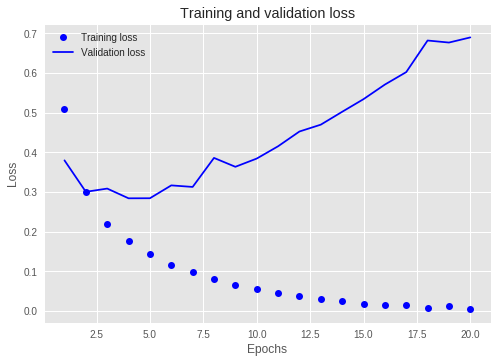

In [15]:
#Ploting the training and validation loss
plt.style.use('ggplot')
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
epochs = range(1,len(acc)+1)

plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

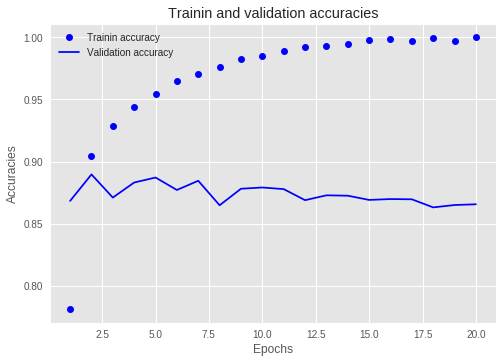

In [16]:
#plotting the training and validation accuracies
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs,acc,'bo',label='Trainin accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Trainin and validation accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracies')
plt.legend()
plt.show()

In [22]:
#evaluating the model
result = model.evaluate(x_test,y_test)
print("the approach achieves:",str(result[1]*100)+"% percent")

25000/25000 [==============================] - 3s 137us/step
the approach achieves: 85.06% percent


**summary:**
*As we can see the model done greatly in training set with 99% accuracy and with prominent loss showing great hope , but there is no prominent decrease in the loss and increase in accuracy in validation set. This is where the model can get trickier with overfitting the dataset to the training model ,after evaluating the model the model accuracy shown of 85.06%acc. As we seen in the plot validation be low with 4epoch lets try that! *

# Retraining a model from scratch

In [27]:
#building a neural network
model2 = Sequential()
model2.add(Dense(16,activation='relu',input_shape=(10000,)))
model2.add(Dense(16,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))
#compiling the model
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
#fitting the data to the model
model2.fit(x_train,y_train,epochs=4,batch_size=512)


Epoch 1/4
25000/25000 [==============================] - 2s 74us/step - loss: 0.4584 - acc: 0.8133
Epoch 2/4
25000/25000 [==============================] - 2s 66us/step - loss: 0.2630 - acc: 0.9095
Epoch 3/4
25000/25000 [==============================] - 2s 67us/step - loss: 0.2005 - acc: 0.9282
Epoch 4/4
25000/25000 [==============================] - 2s 65us/step - loss: 0.1685 - acc: 0.9388


In [28]:
#evaluating the model
results = model2.evaluate(x_test,y_test)

25000/25000 [==============================] - 4s 141us/step


In [29]:
#results are
print("model2 approaches the accuracy of :",results[1])

model2 approaches the accuracy of : 0.88256


**summary:** *The more we tweak the parameters the result also changes but there are number of parameter to tweak and we cannot all at once so to experiment with this model *

In [41]:
#adding more layers to the network
model3 = Sequential()
model3.add(Dense(32,activation='relu',input_shape=(10000,)))
model3.add(Dense(32,activation='relu'))
model3.add(Dense(32,activation='relu'))
model3.add(Dense(1,activation='sigmoid'))

#compiling the model
model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
#fitting the data
model3.fit(x_train,y_train,epochs=23,batch_size=123)


Epoch 1/23
25000/25000 [==============================] - 3s 123us/step - loss: 0.3440 - acc: 0.8550
Epoch 2/23
25000/25000 [==============================] - 3s 105us/step - loss: 0.2038 - acc: 0.9217
Epoch 3/23
25000/25000 [==============================] - 3s 106us/step - loss: 0.1562 - acc: 0.9424
Epoch 4/23
25000/25000 [==============================] - 3s 105us/step - loss: 0.1136 - acc: 0.9592
Epoch 5/23
25000/25000 [==============================] - 2s 99us/step - loss: 0.0785 - acc: 0.9733
Epoch 6/23
25000/25000 [==============================] - 2s 100us/step - loss: 0.0510 - acc: 0.9836
Epoch 7/23
25000/25000 [==============================] - 2s 99us/step - loss: 0.0309 - acc: 0.9902
Epoch 8/23
25000/25000 [==============================] - 2s 98us/step - loss: 0.0199 - acc: 0.9947
Epoch 9/23
25000/25000 [==============================] - 2s 98us/step - loss: 0.0117 - acc: 0.9967
Epoch 10/23
25000/25000 [==============================] - 2s 97us/step - loss: 0.0119 - acc: 0

In [42]:
#evaluating the model
result = model3.evaluate(x_test,y_test)

25000/25000 [==============================] - 4s 142us/step


In [43]:
result[1]

0.85628